In [1]:
#导入所需的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [2]:
#导入原始数据集
df=pd.read_csv('./train.csv')
df.head()

,id,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,...,num_29,num_30,num_31,num_32,num_33,num_34,num_35,num_36,num_37,target
0,0,2,103,9,4,3,1,3,4,4,...,2.000000,3.0,0.000000,0.0,0.0,0.0,0.0,0.089758,0.000129,0.0
1,1,0,177,6,2,2,1,2,4,4,...,0.968742,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000312,0.0
2,2,7,70,7,4,5,0,3,4,4,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000164,0.0
3,3,11,166,7,2,3,1,1,1,2,...,0.021729,0.0,0.021729,0.0,0.0,0.0,0.0,0.000081,0.000205,0.0
4,4,0,178,10,4,3,0,4,4,4,...,30.000000,30.0,0.000000,0.0,0.0,0.0,0.0,6127.621124,0.000298,0.0


In [4]:
#查看数据基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 60 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      800000 non-null  int64  
 1   cat_0   800000 non-null  int64  
 2   cat_1   800000 non-null  int64  
 3   cat_2   800000 non-null  int64  
 4   cat_3   800000 non-null  int64  
 5   cat_4   800000 non-null  int64  
 6   cat_5   800000 non-null  int64  
 7   cat_6   800000 non-null  int64  
 8   cat_7   800000 non-null  int64  
 9   cat_8   800000 non-null  int64  
 10  cat_9   800000 non-null  int64  
 11  cat_10  800000 non-null  int64  
 12  cat_11  800000 non-null  int64  
 13  cat_12  800000 non-null  float64
 14  cat_13  800000 non-null  int64  
 15  cat_14  800000 non-null  int64  
 16  cat_15  800000 non-null  int64  
 17  cat_16  800000 non-null  int64  
 18  cat_17  800000 non-null  int64  
 19  cat_18  800000 non-null  int64  
 20  cat_19  800000 non-null  int64  
 21  num_0   80

In [5]:
#查看数据是否有重复值
df.duplicated().sum()

0

In [6]:
#查看用户ID是否有重复值
len(np.unique(df['id']))==df.shape[0]

True

# 2 探索特征分布情况

In [7]:
df.describe()

,id,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,...,num_29,num_30,num_31,num_32,num_33,num_34,num_35,num_36,num_37,target
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,...,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000
mean,399999.500000,11.326667,93.369439,7.133563,3.910350,3.719691,0.618034,4.059024,3.946736,3.948812,...,17.316756,13.783345,7.036945,4.225609,2.275005,0.151518,3.305656e+03,4451.633843,0.000495,0.013250
std,230940.252015,7.532890,84.283980,2.485475,0.424801,1.155052,0.485869,2.062829,0.403059,0.300025,...,11.062003,11.067024,8.457270,7.156476,5.156571,15.736397,9.300704e+04,8239.089604,0.000690,0.114344
min,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,199999.750000,5.000000,25.000000,7.000000,4.000000,3.000000,0.000000,3.000000,4.000000,4.000000,...,6.000000,2.504976,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.127790,0.000113,0.000000
50%,399999.500000,11.000000,66.000000,7.000000,4.000000,3.000000,1.000000,4.000000,4.000000,4.000000,...,20.000000,12.786394,3.000000,0.703686,0.000000,0.000000,1.144409e-04,698.475656,0.000246,0.000000
75%,599999.250000,17.000000,141.000000,9.000000,4.000000,5.000000,1.000000,5.000000,4.000000,4.000000,...,28.000000,25.000000,12.000000,5.000000,1.995969,0.000000,6.930312e-02,5456.293736,0.000542,0.000000
max,799999.000000,30.000000,357.000000,10.000000,5.000000,6.000000,1.000000,12.000000,5.000000,5.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,5232.081380,4.169229e+07,243447.173298,0.003287,1.000000


In [8]:
df['target'].value_counts()

0.0    789400
1.0     10600
Name: target, dtype: int64

<Axes: ylabel='target'>

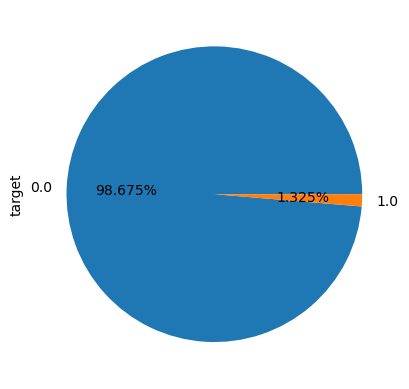

In [9]:
df['target'].value_counts().plot(kind='pie',autopct='%.3f%%')

# 3 数据预处理，初步建模，建立benchmark

In [10]:
#提取特征矩阵和标签
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [11]:
x.head()

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,...,num_28,num_29,num_30,num_31,num_32,num_33,num_34,num_35,num_36,num_37
0,2,103,9,4,3,1,3,4,4,4,...,0.0,2.000000,3.0,0.000000,0.0,0.0,0.0,0.0,0.089758,0.000129
1,0,177,6,2,2,1,2,4,4,4,...,0.0,0.968742,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000312
2,7,70,7,4,5,0,3,4,4,4,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000164
3,11,166,7,2,3,1,1,1,2,4,...,0.0,0.021729,0.0,0.021729,0.0,0.0,0.0,0.0,0.000081,0.000205
4,0,178,10,4,3,0,4,4,4,4,...,0.0,30.000000,30.0,0.000000,0.0,0.0,0.0,0.0,6127.621124,0.000298


In [12]:
x.shape

(800000, 58)

In [13]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
799995    0.0
799996    0.0
799997    0.0
799998    0.0
799999    0.0
Name: target, Length: 800000, dtype: float64

In [14]:
#切分训练集和测试集,并且进行随机数打乱
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.3,random_state=12)

In [15]:
Xtrain.shape

(560000, 58)

In [16]:
Xtrain

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,...,num_28,num_29,num_30,num_31,num_32,num_33,num_34,num_35,num_36,num_37
419910,18,31,1,4,4,1,4,4,4,4,...,0.0,5.000000,1.000000,2.000000,0.000000,16.000000,0.0,0.001342,0.000000,0.000118
386718,2,98,10,4,4,1,4,4,4,3,...,0.0,25.000000,13.000000,16.000000,0.000000,0.000000,0.0,55929.266124,2432.229827,0.000072
365953,25,89,1,4,3,1,4,4,4,4,...,0.0,18.000000,30.000000,2.000000,3.000000,1.000000,0.0,0.000000,112.633561,0.000113
155044,12,21,9,4,3,1,3,4,4,4,...,0.0,26.400914,29.480183,7.762195,6.000000,1.440549,0.0,582.695686,6475.638370,0.000228
630096,12,69,7,4,3,1,3,4,4,4,...,0.0,22.278410,10.426137,14.863636,0.710228,0.857954,0.0,0.558017,4602.687136,0.000352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564465,10,11,9,4,3,1,2,4,4,4,...,0.0,30.000000,25.000000,1.000000,21.000000,14.000000,0.0,0.022586,2337.837385,0.000283
412925,28,205,7,3,5,0,4,4,4,4,...,0.0,2.050762,1.997970,0.000000,0.014213,0.000000,0.0,0.000000,232.574598,0.000528
255366,17,123,1,4,2,0,2,4,4,2,...,0.0,12.000000,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,164.968904,0.000055
759451,7,300,10,4,6,1,4,4,4,4,...,0.0,13.000000,18.000000,0.000000,0.000000,0.000000,0.0,0.000298,0.119201,0.000048


In [17]:
#重置训练集和测试集的索引
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.reset_index(drop=True,inplace=True)

In [18]:
Xtrain

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,...,num_28,num_29,num_30,num_31,num_32,num_33,num_34,num_35,num_36,num_37
0,18,31,1,4,4,1,4,4,4,4,...,0.0,5.000000,1.000000,2.000000,0.000000,16.000000,0.0,0.001342,0.000000,0.000118
1,2,98,10,4,4,1,4,4,4,3,...,0.0,25.000000,13.000000,16.000000,0.000000,0.000000,0.0,55929.266124,2432.229827,0.000072
2,25,89,1,4,3,1,4,4,4,4,...,0.0,18.000000,30.000000,2.000000,3.000000,1.000000,0.0,0.000000,112.633561,0.000113
3,12,21,9,4,3,1,3,4,4,4,...,0.0,26.400914,29.480183,7.762195,6.000000,1.440549,0.0,582.695686,6475.638370,0.000228
4,12,69,7,4,3,1,3,4,4,4,...,0.0,22.278410,10.426137,14.863636,0.710228,0.857954,0.0,0.558017,4602.687136,0.000352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559995,10,11,9,4,3,1,2,4,4,4,...,0.0,30.000000,25.000000,1.000000,21.000000,14.000000,0.0,0.022586,2337.837385,0.000283
559996,28,205,7,3,5,0,4,4,4,4,...,0.0,2.050762,1.997970,0.000000,0.014213,0.000000,0.0,0.000000,232.574598,0.000528
559997,17,123,1,4,2,0,2,4,4,2,...,0.0,12.000000,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,164.968904,0.000055
559998,7,300,10,4,6,1,4,4,4,4,...,0.0,13.000000,18.000000,0.000000,0.000000,0.000000,0.0,0.000298,0.119201,0.000048


In [19]:
clf=LR(max_iter=5000)
clf=clf.fit(Xtrain,Ytrain)

In [20]:
print('训练集上的预测准确率为：',clf.score(Xtrain,Ytrain))
print('测试集上的预测准确率为：',clf.score(Xtest,Ytest))

训练集上的预测准确率为： 0.9866553571428571
测试集上的预测准确率为： 0.9865625


In [21]:
confusion_matrix(Ytrain,clf.predict(Xtrain))

array([[552523,     66],
       [  7407,      4]], dtype=int64)

In [22]:
confusion_matrix(Ytest,clf.predict(Xtest))

array([[236775,     36],
       [  3189,      0]], dtype=int64)

In [23]:
#查看训练集上auc面积
area=roc_auc_score(Ytrain,clf.predict_proba(Xtrain)[:,1])
area

0.7830978273382643

In [24]:
#查看测试集上auc面积
area=roc_auc_score(Ytest,clf.predict_proba(Xtest)[:,1])
area

0.7905061209083704

In [25]:
print(classification_report(Ytrain,clf.predict(Xtrain)))
#可以看出少数类完全没有预测到，是由于非5G用户过多导致
#由此可以看出此时的模型是完全无效的

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    552589
         1.0       0.06      0.00      0.00      7411

    accuracy                           0.99    560000
   macro avg       0.52      0.50      0.50    560000
weighted avg       0.97      0.99      0.98    560000



# 4模型调优

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [27]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560000 entries, 0 to 559999
Data columns (total 58 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat_0   560000 non-null  int64  
 1   cat_1   560000 non-null  int64  
 2   cat_2   560000 non-null  int64  
 3   cat_3   560000 non-null  int64  
 4   cat_4   560000 non-null  int64  
 5   cat_5   560000 non-null  int64  
 6   cat_6   560000 non-null  int64  
 7   cat_7   560000 non-null  int64  
 8   cat_8   560000 non-null  int64  
 9   cat_9   560000 non-null  int64  
 10  cat_10  560000 non-null  int64  
 11  cat_11  560000 non-null  int64  
 12  cat_12  560000 non-null  float64
 13  cat_13  560000 non-null  int64  
 14  cat_14  560000 non-null  int64  
 15  cat_15  560000 non-null  int64  
 16  cat_16  560000 non-null  int64  
 17  cat_17  560000 non-null  int64  
 18  cat_18  560000 non-null  int64  
 19  cat_19  560000 non-null  int64  
 20  num_0   560000 non-null  int64  
 21  num_1   56

In [22]:
#对模型进行归一化处理
mms=MinMaxScaler()
mms=mms.fit(Xtrain.iloc[:,20:])

In [23]:
mms.transform(Xtrain.iloc[:,20:])

array([[3.02083333e-01, 9.42102559e-03, 5.46889482e-01, ...,
        4.95435549e-11, 0.00000000e+00, 3.60390818e-02],
       [6.59722222e-02, 3.51039936e-04, 7.49181038e-01, ...,
        2.06505728e-03, 1.00553759e-02, 2.19192391e-02],
       [6.94444444e-02, 9.15700256e-04, 6.29461115e-01, ...,
        0.00000000e+00, 4.65652047e-04, 3.44340389e-02],
       ...,
       [2.77777778e-01, 1.61863444e-02, 6.82244535e-01, ...,
        0.00000000e+00, 6.82017929e-04, 1.66742624e-02],
       [4.72222222e-01, 7.15839191e-03, 4.14383442e-01, ...,
        1.09862041e-11, 4.92802078e-07, 1.45623279e-02],
       [3.22916667e-01, 2.77280986e-03, 6.81521323e-01, ...,
        0.00000000e+00, 4.92857055e-09, 3.08690110e-01]])

In [25]:
Xtrain_mms=pd.DataFrame(mms.transform(Xtrain.iloc[:,20:]),columns=Xtrain.columns[20:])

In [26]:
Xtrain=pd.concat([Xtrain.iloc[:,0:20],Xtrain_mms],axis=1)
Xtrain.head()

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,...,num_28,num_29,num_30,num_31,num_32,num_33,num_34,num_35,num_36,num_37
0,18,31,1,4,4,1,4,4,4,4,...,0.0,0.166667,0.033333,0.066667,0.000000,0.533333,0.0,4.954355e-11,0.000000,0.036039
1,2,98,10,4,4,1,4,4,4,3,...,0.0,0.833333,0.433333,0.533333,0.000000,0.000000,0.0,2.065057e-03,0.010055,0.021919
2,25,89,1,4,3,1,4,4,4,4,...,0.0,0.600000,1.000000,0.066667,0.100000,0.033333,0.0,0.000000e+00,0.000466,0.034434
3,12,21,9,4,3,1,3,4,4,4,...,0.0,0.880030,0.982673,0.258740,0.200000,0.048018,0.0,2.151467e-05,0.026772,0.069261
4,12,69,7,4,3,1,3,4,4,4,...,0.0,0.742614,0.347538,0.495455,0.023674,0.028598,0.0,2.060347e-08,0.019029,0.107055


In [27]:
Xtest_mms=pd.DataFrame(mms.transform(Xtest.iloc[:,20:]),columns=Xtest.columns[20:])
Xtest=pd.concat([Xtest.iloc[:,0:20],Xtest_mms],axis=1)
Xtest.head()

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,...,num_28,num_29,num_30,num_31,num_32,num_33,num_34,num_35,num_36,num_37
0,11,12,9,4,5,1,12,4,4,4,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.055160
1,10,275,4,4,5,1,3,4,4,4,...,0.0,0.633333,1.000000,0.233333,0.033333,0.400000,0.0,3.308242e-03,0.013262,0.034843
2,18,111,8,4,3,0,5,4,4,4,...,0.0,0.936500,0.851334,0.370829,0.431164,0.486837,0.0,2.029802e-04,0.023462,0.132514
3,14,73,7,4,4,0,5,4,4,4,...,0.0,0.466667,0.266667,0.900000,0.000000,0.000000,0.0,1.108409e-09,0.021630,0.108363
4,13,62,1,4,5,0,4,4,4,4,...,0.0,0.000000,0.015386,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.023426


In [33]:
clf1=LR(max_iter=5000)
clf1=clf1.fit(Xtrain,Ytrain)
print('训练集上的预测准确率为：',clf1.score(Xtrain,Ytrain))
print('测试集上的预测准确率为：',clf1.score(Xtest,Ytest))

训练集上的预测准确率为： 0.9867446428571428
测试集上的预测准确率为： 0.9866791666666667


In [34]:
confusion_matrix(Ytrain,clf1.predict(Xtrain))

array([[552574,     15],
       [  7408,      3]], dtype=int64)

In [35]:
confusion_matrix(Ytest,clf1.predict(Xtest))

array([[236803,      8],
       [  3189,      0]], dtype=int64)

In [36]:
#查看训练集上auc面积
area=roc_auc_score(Ytrain,clf1.predict_proba(Xtrain)[:,1])
area

0.8261473091140665

In [37]:
#查看测试集上auc面积
area=roc_auc_score(Ytest,clf1.predict_proba(Xtest)[:,1])
area

0.8325116483656432

In [38]:
print(classification_report(Ytrain,clf1.predict(Xtrain)))
#警告表示目标值为0的占比还是过于多，需要继续调优

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    552589
         1.0       0.17      0.00      0.00      7411

    accuracy                           0.99    560000
   macro avg       0.58      0.50      0.50    560000
weighted avg       0.98      0.99      0.98    560000



# 4.2使用交叉验证选取最优参数

In [25]:
绘制学习曲线选取最优参数C
s_mean=[]
Crange= np.linspace(1,15,10)
for i in Crange:
    #clf=LR(C=i)
   # s_mean.append(cross_val_score(clf,Xtrain,Ytrain,cv=5).mean())
print(f"当C={Crange[s_mean.index(max(s_mean))]}时,准确率最高为{max(s_mean)}")
plt.plot(Crange,s_mean,c="r")

# 4.3改变样本权重

In [1]:
clf3=LR(max_iter=11000,C=9.4,class_weight="balanced")
clf3=clf3.fit(Xtrain,Ytrain)
print('训练集上的预测准确率为：',clf3.score(Xtrain,Ytrain))
print('测试集上的预测准确率为：',clf3.score(Xtest,Ytest))

NameError: name 'LR' is not defined

In [51]:
print(classification_report(Ytrain,clf3.predict(Xtrain)))

              precision    recall  f1-score   support

         0.0       1.00      0.78      0.88    552589
         1.0       0.05      0.76      0.09      7411

    accuracy                           0.78    560000
   macro avg       0.52      0.77      0.48    560000
weighted avg       0.98      0.78      0.87    560000



In [52]:
#查看训练集上auc面积
area=roc_auc_score(Ytrain,clf3.predict_proba(Xtrain)[:,1])
area

0.845489509937112

In [53]:
confusion_matrix(Ytest,clf3.predict(Xtest))

array([[185684,  51127],
       [   720,   2469]], dtype=int64)

In [55]:
#查看测试集上auc面积
area=roc_auc_score(Ytest,clf3.predict_proba(Xtest)[:,1])
area

0.8489930946264206

In [57]:
confusion_matrix(Ytrain,clf3.predict(Xtrain))

array([[433424, 119165],
       [  1759,   5652]], dtype=int64)

# 4.4 利用过取样平衡样本权重

In [28]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [29]:
model_smote = SMOTE()
X_resampled, y_resampled = model_smote.fit_resample(Xtrain, Ytrain)
print(Counter(y_resampled))
X_test_resampled, y_test_resampled = model_smote.fit_resample(Xtest, Ytest)
print(Counter(y_test_resampled))

Counter({0.0: 552589, 1.0: 552589})
Counter({0.0: 236811, 1.0: 236811})


In [30]:
clf4=LR(max_iter=10000,C=9.4)
clf4=clf4.fit(X_resampled, y_resampled)
print('训练集上的预测准确率为：',clf4.score(X_resampled, y_resampled))
print('测试集上的预测准确率为：',clf4.score(Xtest,Ytest))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


训练集上的预测准确率为： 0.8007886512398907
测试集上的预测准确率为： 0.7977291666666667


In [31]:
print('测试集上的预测准确率为：',clf4.score(X_test_resampled,y_test_resampled))

测试集上的预测准确率为： 0.8098758081339127


In [32]:
#查看训练集上auc面积
area=roc_auc_score(y_resampled,clf4.predict_proba(X_resampled)[:,1])
area

0.8719908348749774

In [33]:
#查看测试集上auc面积
area=roc_auc_score(y_test_resampled,clf4.predict_proba(X_test_resampled)[:,1])
area

0.8785937597306618

In [34]:
confusion_matrix(y_test_resampled,clf4.predict(X_test_resampled))

array([[189115,  47696],
       [ 42351, 194460]], dtype=int64)

In [35]:
confusion_matrix(y_resampled,clf4.predict(X_resampled))

array([[441620, 110969],
       [109195, 443394]], dtype=int64)

In [36]:
print(classification_report(y_resampled,clf4.predict(X_resampled)))

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80    552589
         1.0       0.80      0.80      0.80    552589

    accuracy                           0.80   1105178
   macro avg       0.80      0.80      0.80   1105178
weighted avg       0.80      0.80      0.80   1105178



# 5最终模型

In [39]:
#导入所需的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

In [40]:
#导入原始数据集
df=pd.read_csv('./train.csv')
#提取特征矩阵和标签
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]
#切分训练集和测试集,并且进行随机数打乱
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.3,random_state=12)
#重置训练集和测试集的索引
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.reset_index(drop=True,inplace=True)
#对模型进行归一化处理
mms=MinMaxScaler()
mms=mms.fit(Xtrain.iloc[:,20:])
#对训练集进行归一化处理
Xtrain_mms=pd.DataFrame(mms.transform(Xtrain.iloc[:,20:]),columns=Xtrain.columns[20:])
Xtrain=pd.concat([Xtrain.iloc[:,0:20],Xtrain_mms],axis=1)
#对测试集进行归一化处理
Xtest_mms=pd.DataFrame(mms.transform(Xtest.iloc[:,20:]),columns=Xtest.columns[20:])
Xtest=pd.concat([Xtest.iloc[:,0:20],Xtest_mms],axis=1)
model_smote = SMOTE()
#对训练集进行过采样
Xtrain, Ytrain = model_smote.fit_resample(Xtrain, Ytrain)
#对测试集进行过采样
Xtest, Ytest = model_smote.fit_resample(Xtest, Ytest)

In [41]:
clf=LR(max_iter=11000,C=9.4)
clf=clf.fit(Xtrain, Ytrain)
print('训练集上的预测准确率为：',clf.score(X_resampled, y_resampled))
print('测试集上的预测准确率为：',clf.score(Xtest,Ytest))

训练集上的预测准确率为： 0.80024937159444
测试集上的预测准确率为： 0.8090502552668584


In [42]:
confusion_matrix(Ytest,clf.predict(Xtest))

array([[188956,  47855],
       [ 42583, 194228]], dtype=int64)

In [43]:
#查看测试集上auc面积
area=roc_auc_score(Ytest,clf.predict_proba(Xtest)[:,1])
area

0.8781833990349971

In [44]:
print(classification_report(Ytest,clf.predict(Xtest)))

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81    236811
         1.0       0.80      0.82      0.81    236811

    accuracy                           0.81    473622
   macro avg       0.81      0.81      0.81    473622
weighted avg       0.81      0.81      0.81    473622



In [45]:
FPR,recall,thresholds = roc_curve(Ytest,clf.predict_proba(Xtest)[:,1])

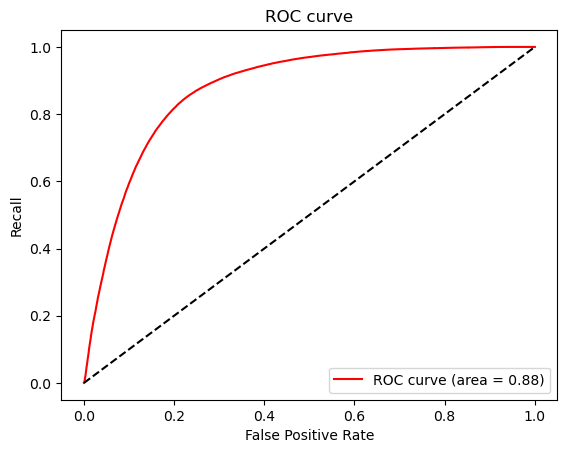

In [46]:
#绘制ROC曲线
plt.figure()
plt.plot(FPR,recall,color='red',
        label='ROC curve (area = %0.2f)'%area)
plt.plot([0,1],[0,1],color='black', linestyle='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()